# "Curiosity" Homework



## Section A - "Choose your fighter"

In this homework, we will be exploring (pun intended) some more agents for the multi-armed bandit task. This assignment will also be a bit more open-ended. Up until now, we have always specified which agents to run, but now you will be tasked with "designing" your own agents. Not from scratch of course, but from the set of building blocks (Actors and Critics) which we established in Lab 4 and Lab 5.

So far we have seen 5 different Actors, which use the estimated values for the different arms to return a selection according to different strategies.

- DeterministicActor
- BoundedRandomActor (parameterized by bound)
- BoundedSequentialActor (parameterized by bound)
- EpsilonActor (parameterized by epsilon)
- SoftmaxActor (parameterized by beta)

We have also seen 3 different Critics, which are responsible for returning the "value" of each arm by combining extrinsic and (possibly) intrinsic values.

- Critic
- CriticUCB
- CriticNovelty

If you do the math, there's 15 possible combinations. Between labs 4 and 5, we have used 7:

- DeterministicActor / Critic
- BoundedRandomActor / Critic
- BoundedSequentialActor / Critic
- EpsilonActor / Critic
- SoftmaxActor / Critic
- DeterministicActor / CriticUCB
- DeterministicActor / CriticNovelty

Our main question: which combinations of Actor and Critic work best?

To help answer this question, we will ask you to select three new combinations to test out. You will be asked to tune your selected agents and run them in different evironments.

### Question 1 [5 pts]

Create a list of three *new* Actor/Critic pairings, which will serve as your agents for the remainder of this assignment.

There's a second restriction we are adding: you can't use the same critic for all three agents.



1.   BoundedRandomActor / CriticUCB
2.   BoundedSequentialActor / CriticUCB
3. EpsilonActor / CriticNovelty



## Section B - Notebook setup [5 pts]

This lab uses the `DeceptiveBanditOneHigh10` environment (along with the `DeceptiveBanditEnv` parent class), which have been newly ported to explorationlib.  Therefore, you will have to update your personal copy of `local_gym.py` to include these two classes (which can be found in the clappm/explorationlib repo).

Install explorationlib, import the agents/critics/environments, and configure the notebook

In [1]:
!pip install --upgrade git+https://github.com/clappm/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git

  Cloning https://github.com/clappm/explorationlib to /tmp/pip-req-build-j_23d0co
  Running command git clone -q https://github.com/clappm/explorationlib /tmp/pip-req-build-j_23d0co
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=25163 sha256=b7b571504c1ee0b0940d2bf65680b9d9bd9125d72bb136936372dbab8583abdf
  Stored in directory: /tmp/pip-ephem-wheel-cache-wcbajglv/wheels/1e/34/cb/ead05d92d76276256463c4482648a973515fea65dd8c73b911
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-4mc77dr5
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-4mc77dr5
     |████████████████████████████████| 18.3 MB 95 kB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=b500ed96697ad1c8147cb3e822a593b82b9bd2b392347af23ab6f96f75288b49
  Stored in directory: /tmp/pip-ephem-wheel-cache-7gfub2fz/wheels/01/f8/86/0dd8c448e192abff02b2ae

In [2]:
# import basic modules
import shutil
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import explorationlib
import explorationlib

# import the type of environment we will be using
from explorationlib.local_gym import BanditUniform4
from explorationlib.local_gym import BanditUniform10
from explorationlib.local_gym import DeceptiveBanditOneHigh10

# import the components to build our agents
from explorationlib.agent import BanditActorCritic

from explorationlib.agent import Critic
from explorationlib.agent import CriticUCB
from explorationlib.agent import CriticNovelty

from explorationlib.agent import EpsilonActor
from explorationlib.agent import DeterministicActor
#from explorationlib.agent import RandomActor
#from explorationlib.agent import SequentialActor
from explorationlib.agent import BoundedRandomActor
from explorationlib.agent import BoundedSequentialActor
from explorationlib.agent import SoftmaxActor

# import the experimental framework
from explorationlib.run import experiment

# import some scoring functions
from explorationlib.score import total_reward
from explorationlib.score import action_entropy

# import some utility functions
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# import some plotting functions
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

pygame 2.1.0 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:

# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

## Section C - Four-arm bandits [40 pts total]



We will first consider the 4-arm environment we've used several times before.

### Creating the training environment

It's always good practice to test your agents on a different environment than the one on which they were trained.  For now we will create a training environment.

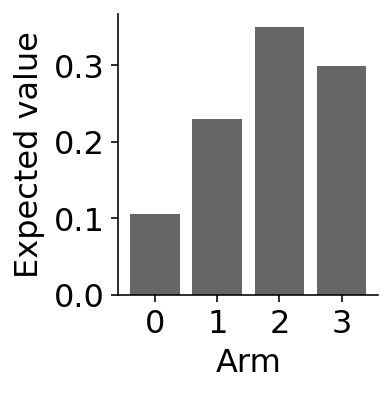

In [4]:
# don't touch
# Shared env params
seed = 412
num_steps = 400

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

### Question 2 [15 pts]

How do you expect your agents to perform relative to each other, in a 4-arm environment after they have been tuned? Which one will do best and which one will do worst?  Please explain your ranking, *considering the functionality and contributions of both the Actor and Critic components of each agent*. To help justify your hypothesis, it will be useful to briefly reference previous simulations and results (Labs 4/5 and HW 4).



1.   BoundedRandomActor / CriticNovelty 
2.   BoundedSequentialActor / CriticNovelty 
3. EpsilonActor / CriticUCB

3 > 1 > 2

I rank the epsilon actor with novelty to trump the other agents. First the EpsilonActor learns from its experiences by adjusting it's q value over time from interactions with the environment. It's a reinforcement Q-learning algorithm. I don't quite remember if the other two actors are Q-learning but the other two actors are more linear and not as "smart". Furthermore, in lab 5 we saw that criticUCB rank highest amongst other critics and significantly higher than CriticNovelty. EpsilonActor / CriticUCB will smoke the other two (I think). And based on the last section of homework 4, we observed that BoundedRandomActor usually outperforms BoundedSequentialActor.

### Tuning Agent 1 for 4-armed bandit [5 pts]

Each of your agents should have 1 tunable parameter.  The name and functionality of this parameter depends on which Actors you selected. For this homework, we are not going to be tuning the Critic in any way, we will simply be using the default parameters. The examples from Lab 5 should show you how to create an agent from a combination of Actor and Critic.

First tune the parameter of Agent 1, whatever it may be, using the training environment we've established. Show your different simulation batches and plots in different cells so that we may see your work.  The exact process by which you tune your agents is up to you.

We understand that tuning can be tedious... we are not asking for perfection. We don't have an answer key for parameter values. The goal is just for you to find parameters that are *good enough* so that the comparison between agents can be considered fair.

In [6]:
num_steps = 4 * 100
num_experiments = 250

b_4:   0%|          | 0/250 [00:00<?, ?it/s]

b_48:   0%|          | 0/250 [00:00<?, ?it/s]

b_92:   0%|          | 0/250 [00:00<?, ?it/s]

b_136:   0%|          | 0/250 [00:00<?, ?it/s]

b_180:   0%|          | 0/250 [00:00<?, ?it/s]

b_224:   0%|          | 0/250 [00:00<?, ?it/s]

b_268:   0%|          | 0/250 [00:00<?, ?it/s]

b_312:   0%|          | 0/250 [00:00<?, ?it/s]

b_356:   0%|          | 0/250 [00:00<?, ?it/s]

b_400:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

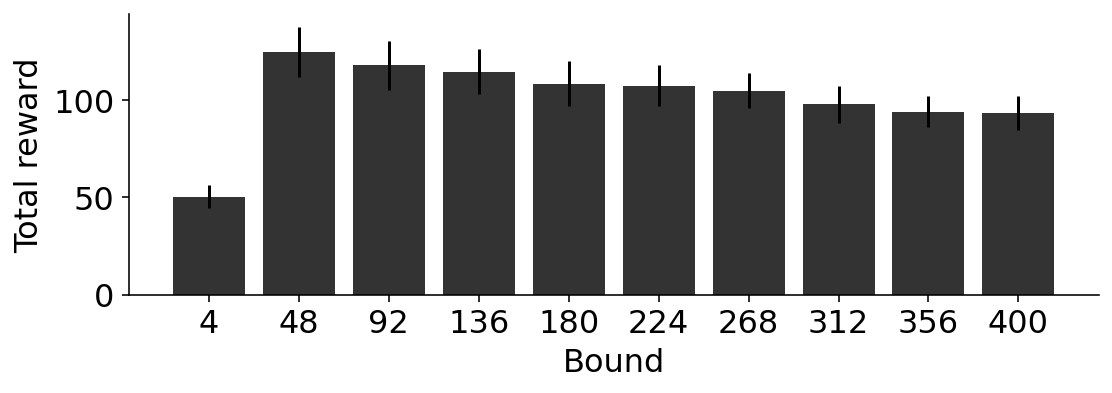

In [7]:
# BoundedRandomActor / CriticNovelty

# CHANGE ME
start = 4 # min 4
stop = num_steps # max num_steps
num_search = 10 # ?

# -
# LEAVE ME
bounds = np.linspace(start, stop, num_search).astype(int)
names = [str(np.round(bound, 2)) for bound in bounds]

# !
results = []
for i, (name, bound) in enumerate(zip(names, bounds)):
    agent = BanditActorCritic(
        BoundedRandomActor(num_actions=env.num_arms, bound=bound),
        CriticNovelty(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"b_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res in zip(names, results):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s) in zip(names, scores):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot
fig = plt.figure(figsize=(8, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Bound")
plt.tight_layout()
sns.despine()

What parameter value did you you settle on for Agent 1?

A bound of 48, this produces highest total reward.

### Tuning Agent 2 for 4-armed bandit [5 pts]

b_4:   0%|          | 0/250 [00:00<?, ?it/s]

b_48:   0%|          | 0/250 [00:00<?, ?it/s]

b_92:   0%|          | 0/250 [00:00<?, ?it/s]

b_136:   0%|          | 0/250 [00:00<?, ?it/s]

b_180:   0%|          | 0/250 [00:00<?, ?it/s]

b_224:   0%|          | 0/250 [00:00<?, ?it/s]

b_268:   0%|          | 0/250 [00:00<?, ?it/s]

b_312:   0%|          | 0/250 [00:00<?, ?it/s]

b_356:   0%|          | 0/250 [00:00<?, ?it/s]

b_400:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

total_reward:   0%|          | 0/250 [00:00<?, ?it/s]

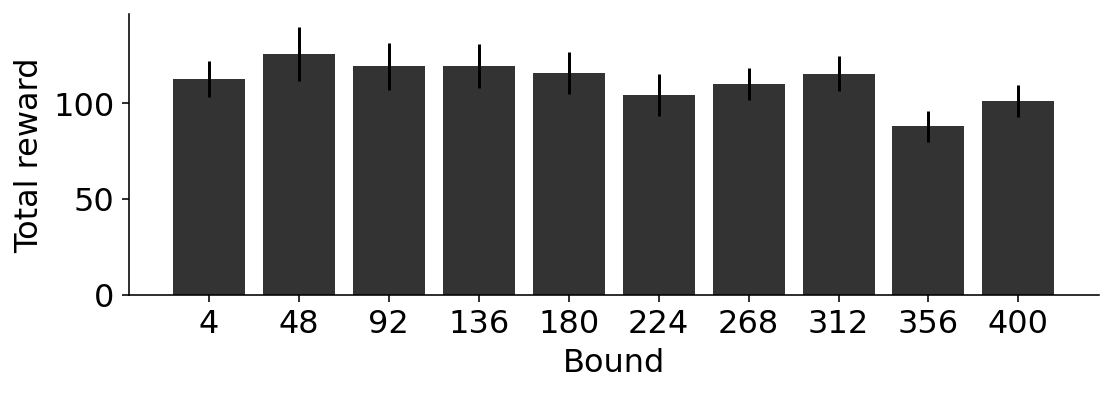

In [8]:
# BoundedSequentialActor / CriticNovelty 

# CHANGE ME
start = 4 # min 4
stop = num_steps # max num_steps
num_search = 10 # ?

# -
# LEAVE ME
bounds = np.linspace(start, stop, num_search).astype(int)
names = [str(np.round(bound, 2)) for bound in bounds]

# !
results = []
for i, (name, bound) in enumerate(zip(names, bounds)):
    agent = BanditActorCritic(
        BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
        CriticNovelty(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"b_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res in zip(names, results):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s) in zip(names, scores):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot
fig = plt.figure(figsize=(8, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Bound")
plt.tight_layout()
sns.despine()

What parameter value did you you settle on for Agent 2?

A bound of 48, this produces highest total reward.

### Tuning Agent 3 for 4-armed bandit [5 pts]

In [11]:
# EpsilonActor / CriticUCB

num_steps = 4 * 100
epsilons = [0.05, 0.2, 0.4, 0.6, 0.8, 0.95]

names = [str(epsilon) for epsilon in epsilons]
colors = ["blue", "green", "purple", "red", "orange", "yellow"]

# !
results = []
for i, (name, epsilon) in enumerate(zip(names, epsilons)):
    agent = BanditActorCritic(
        EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
        CriticUCB(num_inputs=env.num_arms, default_value=0.0)
    )
    log = experiment(
        f"ep_{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=100,
        dump=False,
        split_state=False,
    )
    results.append(log)

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

ep_0:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

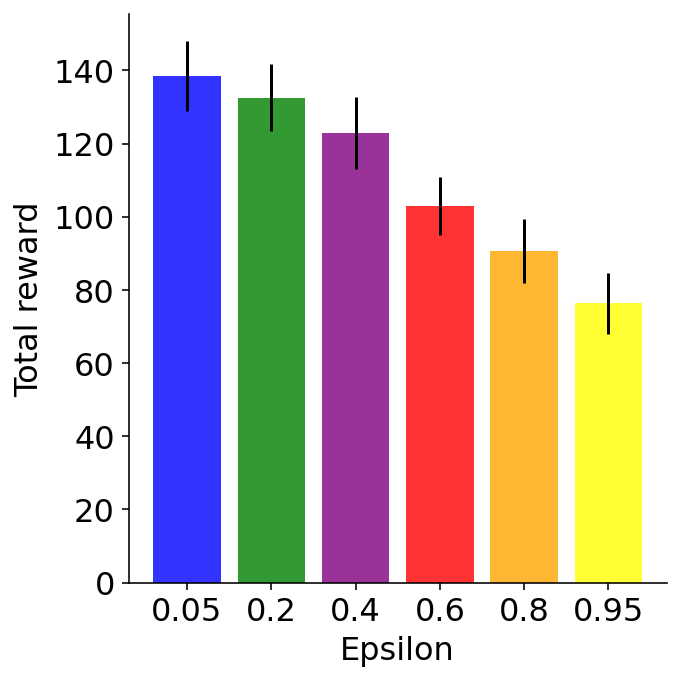

In [12]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 5))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Epsilon")
plt.tight_layout()
sns.despine()

What parameter value did you you settle on for Agent 3?

Epsilon of 0.05, it had the highest total reward.

### Creating a testing environment

In [ ]:
# don't touch
# Shared env params
seed = 15213
num_steps = 400

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.35)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

### Run 400 experiments and plot the average rewards for the 3 agents [5 pts]

In [13]:
bound = 48
epsilon = 0.05

b-ran:   0%|          | 0/400 [00:00<?, ?it/s]

b-seq:   0%|          | 0/400 [00:00<?, ?it/s]

ep-greedy:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

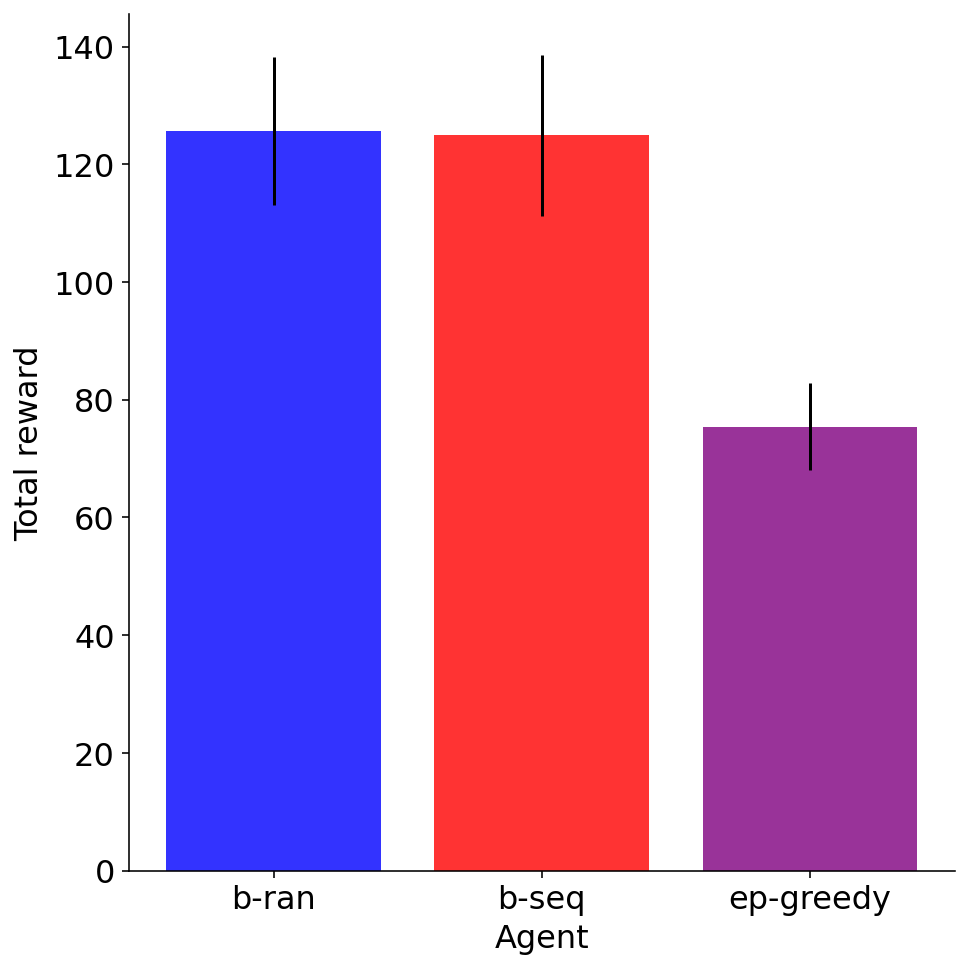

In [16]:
bounded_ran = BanditActorCritic(
    BoundedRandomActor(num_actions=env.num_arms, bound=bound),
    CriticNovelty(num_inputs=env.num_arms, default_value=0.0)
)
bounded_seq = BanditActorCritic(
    BoundedSequentialActor(num_actions=env.num_arms, bound=bound),
    CriticNovelty(num_inputs=env.num_arms, default_value=0.0)
)
epy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=epsilon),
    CriticUCB(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [bounded_ran, bounded_seq, epy]
names = ["b-ran", "b-seq", "ep-greedy"]
colors = ["blue", "red", "purple"]

num_steps = 400
num_experiments = 400

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Question 3 [5 pts]

Did your results match what you predicted in Question 2? If not, do you have any ideas as to why?

Write your answer here.

## Section D - Deceptive bandits [50 pts total]

We will now consider the same types of agents placed into a different type of environment: the deceptive bandit.

### Creating the training environment

We are going to retune our agents, but we're not going to tune them against the deceptive bandit (or else it wouldn't be very deceptive, would it?).  Instead we are going to tune them against the non-deceptive 10-arm bandit from lab, which is identical to the deceptive bandit in terms of arm values but without the deception.

In [ ]:
# don't touch
# Shared env params
seed = 503
num_steps = 400

# Create env
env = BanditUniform10(p_min=0.2, p_max=0.2, p_best=0.8)
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

### Question 4 [15 pts]

How well do you expect your agents to perform in the deceptive 10-arm environment, after being tuned in the non-deceptive environment?  Which one will score the highest and which one will score the lowest?

Similar to when you made a hypothesis in Section C, explain your answer fully.  Base it on your understanding of the properties of the actors and critics, as well as the results in lab. Consider the possible weaknesses of the agents, such as how certain parameter values might allow the agents to perform better in training but also cause the agents to be more easily deceived.

Write your answer here.

### Tuning Agent 1 for 10-armed bandit [5 pts]

The process for tuning agents here should be roughly the same as in Section C.

In [ ]:
# your code cells here

What parameter value did you you settle on for Agent 1?

Write your answer here.

### Tuning Agent 2 for 10-armed bandit [5 pts]

In [ ]:
# your code cells here

What parameter value did you you settle on for Agent 2?

Write your answer here.

### Tuning Agent 3 for 10-armed bandit [5 pts]

In [ ]:
# your code cells here

What parameter value did you you settle on for Agent 3?

Write your answer here.

### Creating a testing (deceptive) environment

In [ ]:
# don't touch
# Shared env params
seed = 15213
num_steps = 400

# Create env
env = DeceptiveBanditOneHigh10()
env.seed(seed)

# Plot env
plot_bandit(env, alpha=0.6)

### Run 400 experiments and plot the average rewards for the 3 agents [5 pts]

In [ ]:
# your code cells here

### Question 5 [5 pts]

Did your results match what you predicted in Question 4? If not, do you have any ideas as to why?

Write your answer here.

### Question 6 [10 pts]

Time for some conclusions. Was there a clear winner among your three selected agents?  Was there one which performed the best against both non-deceptive and deceptive bandits?  Or did different agents perform better or worse in different scenarios?  Which agent would you pick as your favorite?

Write your answer here.

## Submission

**DUE:** 5pm EST, Nov 30, 2021. Email the link to the completed notebook on your Github repository to the TA and me via Canvas.

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*